# Name: PRAKASH KUMAR

# GRIPJUNE22 - The Spark Foundation

# Data Science & Business Analytics Internship

# Task 6 : Prediction using Decision Tree Algorithm

In [46]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [47]:
iris=pd.read_csv("Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [48]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [49]:
iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [50]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [51]:
iris.shape

(150, 6)

In [52]:
iris["Species"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [53]:
iris[iris['SepalWidthCm']>4]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
15,16,5.7,4.4,1.5,0.4,Iris-setosa
32,33,5.2,4.1,1.5,0.1,Iris-setosa
33,34,5.5,4.2,1.4,0.2,Iris-setosa


In [54]:
iris[iris['PetalWidthCm']>2]


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
100,101,6.3,3.3,6.0,2.5,Iris-virginica
102,103,7.1,3.0,5.9,2.1,Iris-virginica
104,105,6.5,3.0,5.8,2.2,Iris-virginica
105,106,7.6,3.0,6.6,2.1,Iris-virginica
109,110,7.2,3.6,6.1,2.5,Iris-virginica
112,113,6.8,3.0,5.5,2.1,Iris-virginica
114,115,5.8,2.8,5.1,2.4,Iris-virginica
115,116,6.4,3.2,5.3,2.3,Iris-virginica
117,118,7.7,3.8,6.7,2.2,Iris-virginica
118,119,7.7,2.6,6.9,2.3,Iris-virginica


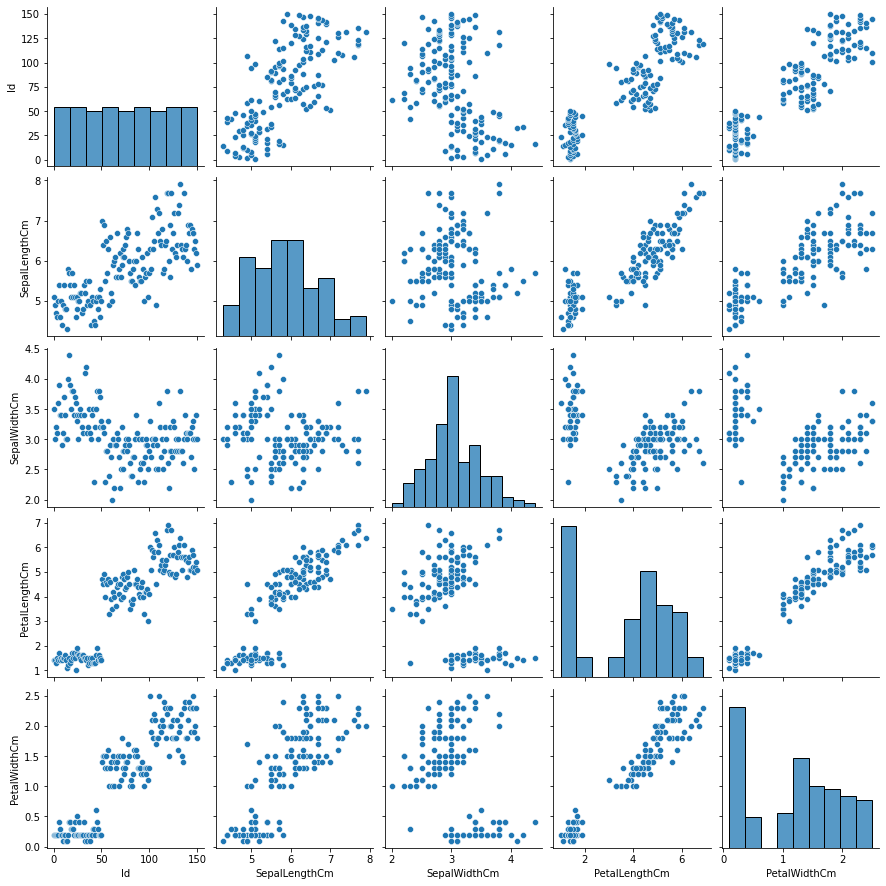

In [55]:
sns.pairplot(iris)

In [56]:
#Convert the categorical data into numbers

map = {
    "Species":{
        "Iris-virginica":1,
        "Iris-setosa":2,
        "Iris-versicolor":3
    }
}

In [57]:
iris = iris.replace(map)
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,2
1,2,4.9,3.0,1.4,0.2,2
2,3,4.7,3.2,1.3,0.2,2
3,4,4.6,3.1,1.5,0.2,2
4,5,5.0,3.6,1.4,0.2,2


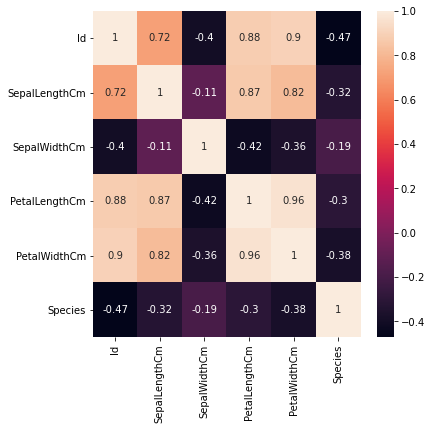

In [58]:
# Correlation between different features
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(iris.corr(), annot=True)

# Split train and test set

In [59]:
x=iris.drop("Species", axis=1)
y=iris[['Species']]

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [62]:
x_train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
103,104,6.3,2.9,5.6,1.8
72,73,6.3,2.5,4.9,1.5
25,26,5.0,3.0,1.6,0.2
18,19,5.7,3.8,1.7,0.3
100,101,6.3,3.3,6.0,2.5


In [63]:
x_test.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
119,120,6.0,2.2,5.0,1.5
105,106,7.6,3.0,6.6,2.1
15,16,5.7,4.4,1.5,0.4
5,6,5.4,3.9,1.7,0.4
27,28,5.2,3.5,1.5,0.2


In [64]:
y_train.head()

,Species
103,1
72,3
25,2
18,2
100,1


In [65]:
y_test.head()

,Species
119,1
105,1
15,2
5,2
27,2


In [66]:
#Model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [67]:
model = DecisionTreeClassifier()

In [68]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [69]:
print("Training Accuracy:", model.score(x_train,y_train))
print("Testing Accuracy:", model.score(x_test, y_test))

Training Accuracy: 1.0
Testing Accuracy: 1.0


In [70]:
#Let's predict out X_test data
y_predict=model.predict(x_test)

In [71]:
y_test.head()

,Species
119,1
105,1
15,2
5,2
27,2


In [72]:
y_predict[0:5]

array([1, 1, 2, 2, 2], dtype=int64)

# Classification Report and Confusion Matrix

In [73]:
from sklearn.metrics import confusion_matrix, classification_report
print("Classification report:\n",classification_report(y_test,y_predict))

Classification report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [74]:
from sklearn.metrics import mean_squared_error

In [75]:
mean_squared_error(y_test,y_predict)

0.0

In [76]:
import sklearn.metrics as sm
print("Accuracy:",sm.accuracy_score(y_test,y_predict))

Accuracy: 1.0


The accuracy is 1 or 100% since i took all the 4 features of the iris dataset.

In [77]:
#confusion matrix
cm=confusion_matrix(y_test,y_predict)
cm

array([[10,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 12]], dtype=int64)

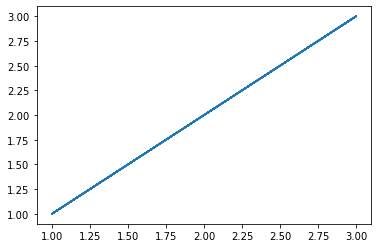

In [78]:
plt.plot(y_predict, y_test)

# Decision Tree Visualization


In [79]:
target = pd.read_csv("iris.csv").Species.unique()
target

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Text(0.5, 1.0, 'Decision Tree')

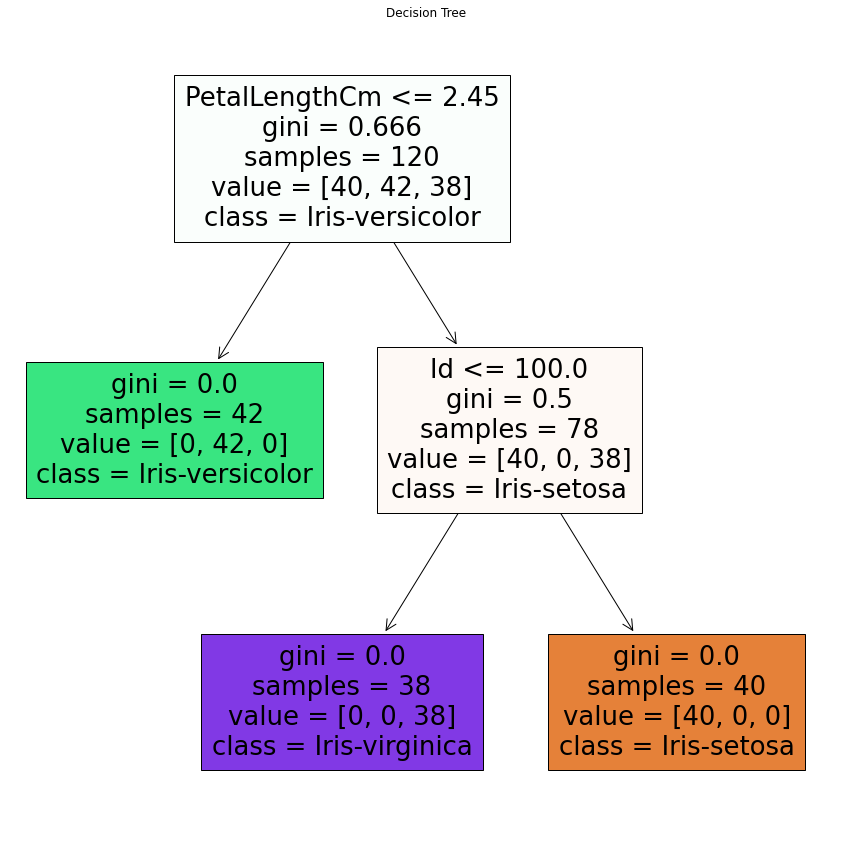

In [80]:
#visualizing the graph
from sklearn import tree
fig = plt.figure(figsize=(15,15))
tree.plot_tree(model, feature_names=iris.columns,class_names=target, filled=True)
plt.rcParams['figure.figsize']=(15,15)
plt.title("Decision Tree")

# Conclusion

I was able to successfully carry-out prediction using Prediction using Decision Tree Algorithm and was able to evaluate the model's accuracy score.

# --------------------------------------- THANK YOU --------------------------------------------